In [145]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import os
import random


(1, 243, 320)
(243, 320)
(1, 243, 320)
(243, 320)
(1, 243, 320)
(243, 320)
(1, 243, 320)
(243, 320)
(1, 243, 320)
(243, 320)
(1, 243, 320)
(243, 320)
(1, 243, 320)
(243, 320)
(1, 243, 320)
(243, 320)
(1, 243, 320)
(243, 320)
(1, 243, 320)
(243, 320)


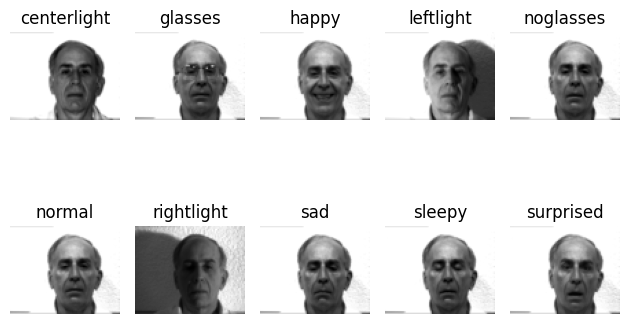

In [146]:
BASE_DIR = 'yalefaces/yalefaces'
person_folders = [
    'person-1',
    'person-2',
    'person-3',
    'person-4',
    'person-5',
    'person-6',
    'person-7',
    'person-8',
    'person-9',
    'person-10',
    'person-11',
    'person-12',
    'person-13',
    'person-14',
    'person-15'
]
person_folder = random.choice(person_folders)
for ith,filename in enumerate(os.listdir(os.path.join(BASE_DIR,person_folder))):
    image = imread(os.path.join(BASE_DIR,person_folder,filename))
    print(image.shape)
    image = image.squeeze(0)
    print(image.shape)
    image = resize(image,(64,80),anti_aliasing=True)
    plt.subplot(2,5,ith+1)
    plt.imshow(image,cmap='gray')
    plt.axis('off')
    plt.title(filename)

plt.tight_layout()
plt.show()


In [147]:
data= {}
for person_folder in person_folders:
    for filename in os.listdir(os.path.join(BASE_DIR,person_folder)):
        image = imread(os.path.join(BASE_DIR,person_folder,filename))
        image = resize(image,(1,64,80),anti_aliasing=True)
        if person_folder not in data:
            data[person_folder] = [image]
        else:
            data[person_folder].append(image)
print(len(data['person-1']))
for person in data:
    #print for know dimensions
    print(data[person][0].shape)
    data[person] =  np.concatenate(data[person],axis=0)
    print(data[person].shape)
    data[person] = data[person].reshape(10,-1)


10
(1, 64, 80)
(10, 64, 80)
(1, 64, 80)
(10, 64, 80)
(1, 64, 80)
(10, 64, 80)
(1, 64, 80)
(10, 64, 80)
(1, 64, 80)
(10, 64, 80)
(1, 64, 80)
(10, 64, 80)
(1, 64, 80)
(10, 64, 80)
(1, 64, 80)
(10, 64, 80)
(1, 64, 80)
(10, 64, 80)
(1, 64, 80)
(10, 64, 80)
(1, 64, 80)
(10, 64, 80)
(1, 64, 80)
(10, 64, 80)
(1, 64, 80)
(10, 64, 80)
(1, 64, 80)
(10, 64, 80)
(1, 64, 80)
(10, 64, 80)


In [148]:
data['person-1'].shape

(10, 5120)

In [149]:
def standardize(images):
    images = (images - images.mean()) / images.std()
    images = images.astype(np.float32)
    return images

In [150]:
class myPCA:
    def __init__(self, d_principles):
        self.d_principles = d_principles
    def fit(self,X):
        cov = (X.T @X)
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        print(f'eigenvectors.shape : {eigenvectors.shape}')
        max_abs_idx = np.argmax(np.abs(eigenvectors),axis=0)
        signs = np.sign(eigenvectors[max_abs_idx,range(eigenvectors.shape[0])])
        print(f'signs.shape : {signs.shape}')
        eigenvectors = eigenvectors*signs[np.newaxis,:]
        eigenvectors = eigenvectors.T #(num_vectors,dim)
        print(f'eigenvectors.shape : {eigenvectors.shape}')
        eigen_pairs = [(np.abs(eigenvalues[i]),eigenvectors[i,:]) for i in range(eigenvectors.shape[0])]
        eigen_pairs.sort(key=lambda pair:pair[0], reverse=True)
        eigenvalues = np.array([value for(value,_) in eigen_pairs])
        eigenvectors = np.array([vector for (_,vector) in eigen_pairs])
        self.principles_values = eigenvalues[:self.d_principles]
        self.W = eigenvectors [:self.d_principles]
    def transform(self,X):
        X_hat = self.W @ X
        return X_hat



In [151]:

PCA = myPCA(d_principles=20)
images = []
for person in data:
    images.append(data[person])
images = np.concatenate(images,axis=0)
images = standardize(images)
images.shape


(150, 5120)

In [152]:
PCA.fit(images)
PCA.W

eigenvectors.shape : (5120, 5120)
signs.shape : (5120,)
eigenvectors.shape : (5120, 5120)


array([[-0.0103703 , -0.01053424, -0.01054564, ..., -0.00139055,
        -0.0015381 , -0.00127438],
       [-0.00053991, -0.00116958, -0.00120037, ..., -0.01153713,
        -0.01075914, -0.01048641],
       [ 0.00350437,  0.00277395,  0.00242154, ...,  0.0134587 ,
         0.01285189,  0.0133675 ],
       ...,
       [ 0.00198308,  0.00198282,  0.00212671, ..., -0.00604882,
        -0.00372426, -0.00923365],
       [ 0.00435989,  0.00384   ,  0.00287027, ..., -0.01025182,
        -0.00763347, -0.00386044],
       [ 0.00237032,  0.00281232,  0.00267273, ...,  0.00159889,
        -0.00242817, -0.00237679]], dtype=float32)

In [153]:
PCA.W.shape

(20, 5120)

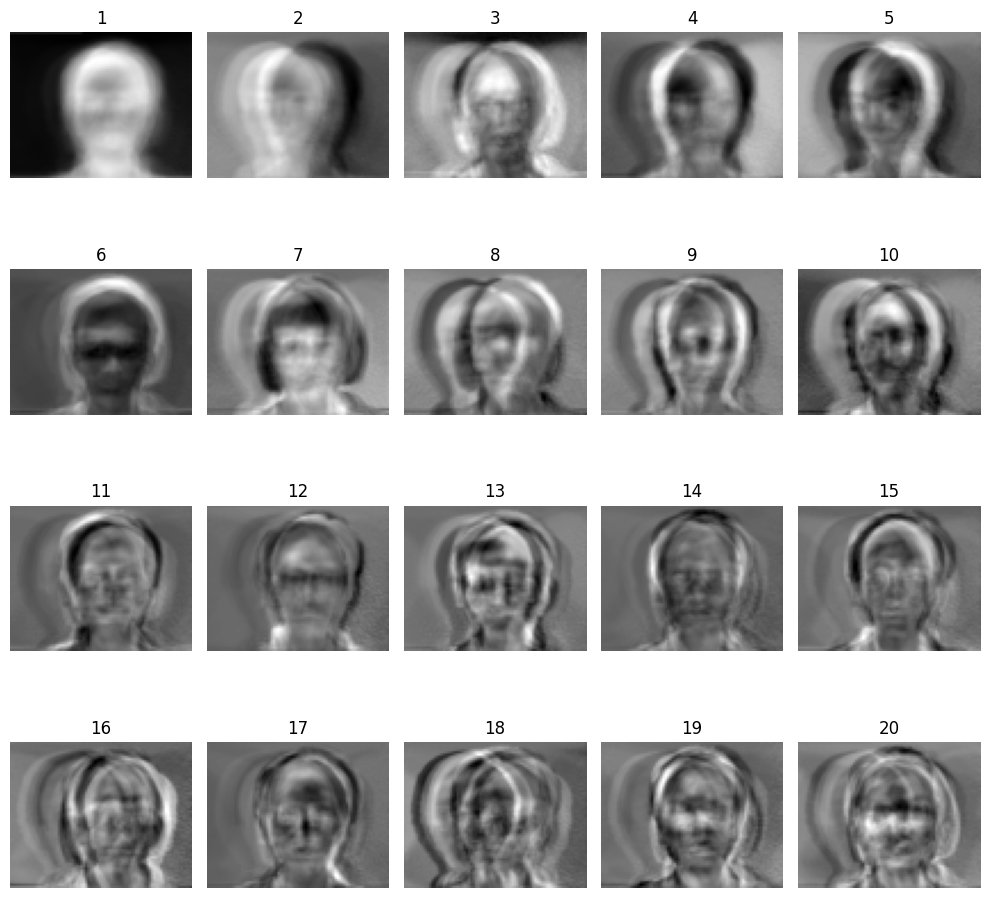

In [154]:
eigenfaces = PCA.W
eigenfaces = eigenfaces.reshape(20,64,80)
plt.figure(figsize=(10,10))
for ith,eigenface in enumerate(eigenfaces):
    plt.subplot(4,5,ith+1)
    plt.imshow(eigenface,cmap='gray')
    plt.axis('off')
    plt.title(ith+1)
plt.tight_layout()
plt.show()

In [155]:
mean_faces = {
    person: np.mean(images, axis = 0) for person, images in data.items()
}
x = data.values()
mean_faces

{'person-1': array([0.85419198, 0.85366156, 0.85297667, ..., 0.8303818 , 0.82890742,
        0.8257649 ]),
 'person-2': array([0.86544893, 0.88261908, 0.87843098, ..., 0.65963892, 0.71646007,
        0.68067589]),
 'person-3': array([0.88537218, 0.8878378 , 0.88600453, ..., 0.78256216, 0.78355067,
        0.77931486]),
 'person-4': array([0.87969966, 0.88051314, 0.88361268, ..., 0.72219289, 0.74870393,
        0.80440018]),
 'person-5': array([0.87413693, 0.87355455, 0.87875135, ..., 0.43889482, 0.43011748,
        0.41276937]),
 'person-6': array([0.86571086, 0.90672724, 0.90728528, ..., 0.75620439, 0.75566818,
        0.7240958 ]),
 'person-7': array([0.9108284 , 0.91332992, 0.91410989, ..., 0.84107537, 0.85577481,
        0.8583894 ]),
 'person-8': array([0.91467928, 0.91475662, 0.91481714, ..., 0.76983082, 0.77107141,
        0.7555712 ]),
 'person-9': array([0.91130895, 0.91350963, 0.91384883, ..., 0.78268471, 0.78721262,
        0.77856838]),
 'person-10': array([0.91386501, 0.91

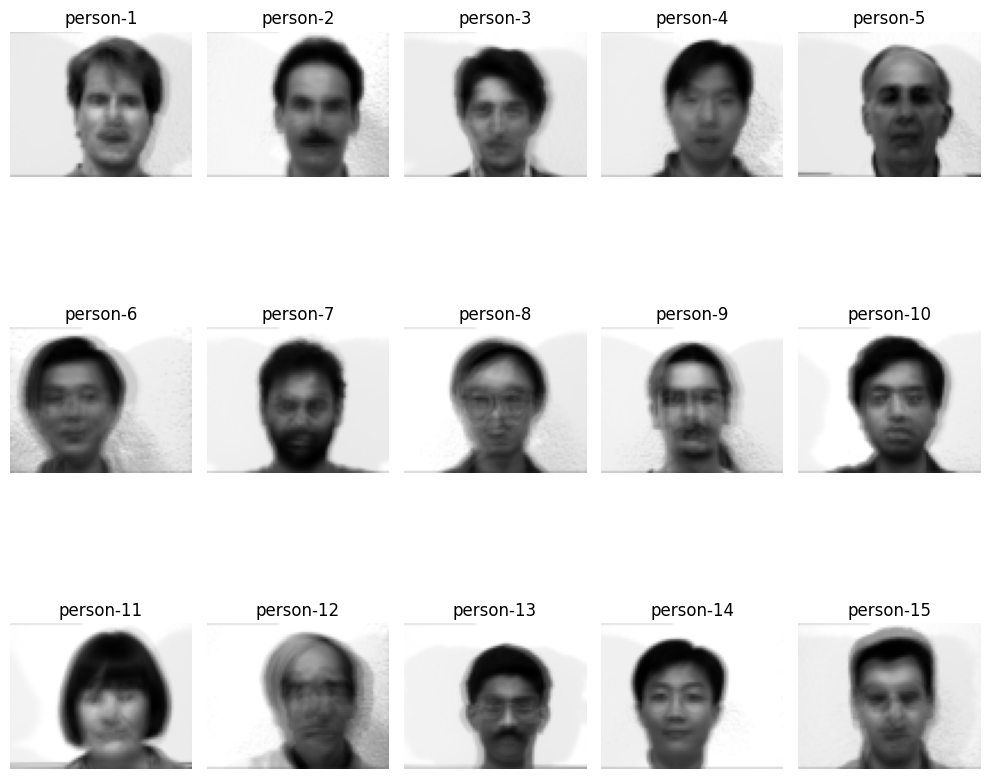

In [156]:
plt.figure(figsize=(10,10))
for ith, person in enumerate(mean_faces):
    mean_face = mean_faces[person]
    mean_face = mean_face.reshape(64,80)
    plt.subplot(3,5,ith+1)
    plt.imshow(mean_face,cmap='gray')
    plt.axis('off')
    plt.title(person)
plt.tight_layout()
plt.show()

In [157]:
projected_mean_faces = {}
for person in mean_faces:
    mean_face = mean_faces[person]
    projected_mean_faces[person] = PCA.transform(mean_face)

In [158]:
projected_mean_faces['person-1'].shape

(20,)

In [160]:
labels = []
test_images = []
TEST_DIR = 'yalefaces/yalefaces/test'
for filename in os.listdir(os.path.join(TEST_DIR)):
    person_name = filename.split(".")[0]
    labels.append(person_name)
    image = imread(os.path.join(TEST_DIR,filename))
    image = resize(image,(1,64,80),anti_aliasing=True)
    test_images.append(image)


In [161]:
test_images = np.concatenate(test_images,axis=0)
test_images.shape

(15, 64, 80)

In [162]:
labels

['person-1',
 'person-10',
 'person-11',
 'person-12',
 'person-13',
 'person-14',
 'person-15',
 'person-2',
 'person-3',
 'person-4',
 'person-5',
 'person-6',
 'person-7',
 'person-8',
 'person-9']

In [166]:
def euclide_dis(X,Y):
    assert X.shape == Y.shape, f'{X.__str__()} and {Y.__str__()} are miss-shaped'
    return (((X-Y)**2).sum())**0.5

In [168]:
predictions = {
}
for label, image in zip(labels,test_images):
    image = image.reshape(-1)
    projected_face = PCA.transform(image)
    closest_distance = np.inf
    closest_person = None
    for person in projected_mean_faces:
        mean_face = projected_mean_faces[person]
        distance = euclide_dis(mean_face,projected_face)
        if distance < closest_distance:
            closest_distance = distance
            closest_person = person
    predictions[label] = closest_person

In [169]:
EMs =[]
for label in predictions:
    EMs.append(label==predictions[label])
print(f'Accuracy: {(np.mean(EMs)*100):0.2f}')

Accuracy: 66.67
